# <ins> Meterorite Landings on Earth </ins>
### _Understanding the Relationship between Meteorite impacts throughout Different Regions_


Throughout history, thousands of evenst know as Impact Events have taken place across the globe. An impact event is the collision between astronomical objects leading to some measurable effects. These events can occur quite regularly in other planetary systems aswell (other planets). 

They can occur from meteorites, the fragments of a meteoroid that survive the entry onto our planet and land on Earth, or meteoroids which typically have minor effects. However, when larger objects impact terrestrial planets like Earth, there can be significant physical and biospheric repercussions. These events provide crucial insight into understanding the makeup of our solar system and planet Earth. They have also played a significant role in the evolutionary history of life in our home. They've been responsible for some mass extinctions, as well as the rise to the dominance of mammals, leading to the eventual dominance of humans on Earth. Some of the most famous impacts events are the Tunguskan event thtat occured in Siberia, Russia, 1908,  which resulted in the a explosion of a meteor flattening around 2,000 square kilometers of forest. Another example is the Chelyabinsk meteor event, a more modern impact taking place in the Ural reginon in Russia, that resulted in numerous injuries. Its meteor is the largest recorded object to have entered earths atmosphere since the Tunguska event. This history suggests that the density of impacts events can be related directly to different regions of our planet, or possible detremined by cycles in time or locations.

![Meteor](https://cff2.earth.com/uploads/2021/12/24065242/Asteroid-impact-scaled.jpg)
##### *_Image Source: https://cff2.earth.com/uploads/2021/12/24065242/Asteroid-impact-scaled.jpg_*

## 2 Methods
### 2.1 Data Collection

This catalogue of data from The Meteoritical Society registered publically at [Data.nasa](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data), a free onlice catalogue of Nasa's publically catalogue datasheets published 2015 [1].

In [38]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

In [47]:
# load data
data = pd.read_csv('data/Meteorite_Landings_20241121.csv')

### 2.2 Data Cleaning

The Meteorite Landing dataset had some colums which were irrelevant to the content of this analysis, so they were removed(id, nametype, fall, recclass, nametype). As well as the column depicting the metorites discovery type since whether being see in person or later discovered. The impact would have likely occured within the region located.

In [40]:
# Changing the formating for when outputting the data
pd.set_option('display.width', 1000)        # Set a high width for display
pd.set_option('display.max_colwidth', None)  # Do not truncate column content


# removing unused columns
data = data.drop(columns=['fall', 'id', 'recclass', 'nametype'])

meteorites = pd.DataFrame(data)
df = meteorites
#  renaming the dataframe
# df = df_cleaned

# print(df)


## Analyses


I will analyze the connections between mass, year, and geolocation through exploratory methods, statistical summaries, and visualizations.


A descripitive analysis on meteorite mass, helps us understand the variety of destrctivess when it comes to these impacts.

In [41]:
# mass statistics
dm = df['mass (g)'].describe()

find = df.loc[df['mass (g)'] == 0]


print(f"Mean mass: {round(dm['mean'],2)} g", '\n')
print(f"Max mass: {round(dm['max'],2)} g")
print(f"Min mass: {(dm['min'])} g (less than a gram)")

Mean mass: 13277.79 g 

Max mass: 60000000.0 g
Min mass: 0.0 g (less than a gram)


Meteorites can come in variety of shapes and sizes, from being up to 60,000,000 grams or about 60 tons, to less than a single gram. Meteorite "Hoba", the largest one on earth comes from Namibia.

This analyse will begin by looking at the count of objects recovered  by each half centuary. As by what this graph shows, 

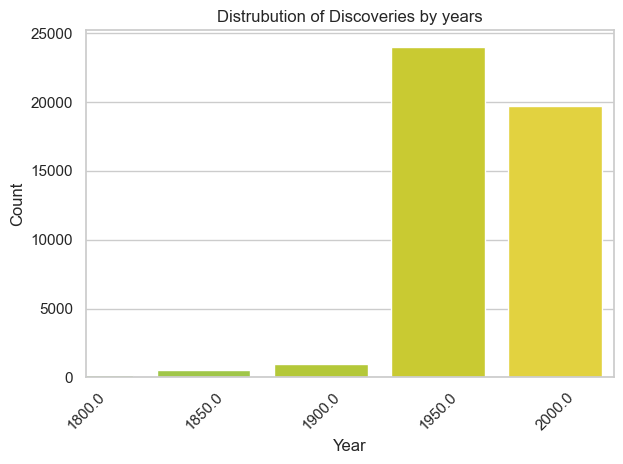

In [42]:
#creating a column by half centuary
df['half_century'] = (df['year'] // 50 * 50)  # Use the correct column name here


c = sns.countplot(x='half_century', hue='half_century', data=df, palette="viridis", legend = False)  # Ensure the column name matches here
c = c.set(title = "Distrubution of Discoveries by years", xlabel = "Year", ylabel = "Count")


plt.xlim(10)
plt.xticks(rotation=45)  # Optional: Rotate labels if necessary
plt.tight_layout()       # Adjust layout to avoid overlap
plt.show()


Over the last 75 years, thanks to increasing enhancements in technology our ability to better record and analyze these event has increased immensly. This helps to show how much more precisely we've been able to understand impact events over the last few decades.

## Analyse

I will explore the relationship between density of impact events  throughout different decades of history, aswell as where these events most frequently occur. This will look at the relationship between, year of discovery, mass, reclat(recorded latitude), reclong (recorded longitude).

## Data

Below is visualization of the relationship between total mass of objects recoved throughout different half centuary's. ex(1900 includes from 1900-1949 groupset)

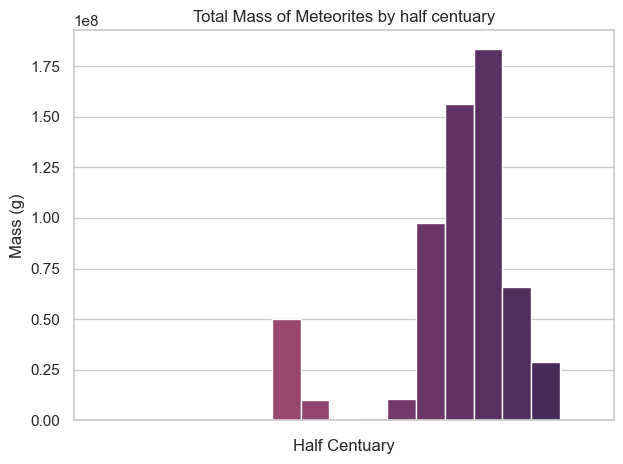

In [43]:


# gather the sums of by mass discovered in each half cent

mass_by_half_centuary = df.groupby('half_century')['mass (g)'].sum().reset_index()



a = sns.barplot(hue = 'half_century', y = 'mass (g)', data = mass_by_half_centuary, legend=False, palette="flare")
a = a.set(title='Total Mass of Meteorites by half centuary', xlabel='Half Centuary', ylabel='Mass (g)')

plt.xticks(rotation=45)  # Rotate labels if overcrowding
plt.tight_layout()       # Adjust layout to avoid overlap
plt.show()




# print(df)

From this we can see there appears to be a normal distribution over the sum mass of meteorites discovered over a cycle of 250 years.

Next, I will explore the relationship between fall location and geolocation. Since this is a lengthy process time-wise calculating the continent location from these coordinates, I will analyze from the years 1914 to 2014, as from within this range technology has allowed a better quantity and quality of data analysis.

In [44]:
import geopandas as gpd
from tqdm import tqdm
from shapely.geometry import Point
from shapely.prepared import prep
import numpy as np

# Load and prepare continents data only once
continents = gpd.read_file('Maps/World_Continents.shp').to_crs(epsg=4326)

# Create prepared geometries for faster spatial operations
continents['prepared_geom'] = continents['geometry'].apply(prep)

# Pre-filter the DataFrame,  excludes entries with lat and long as zero, and all events pre before 1913
df = df[(df['reclat'] != 0) & (df['reclong'] != 0)]
filtered_rows = df[df['year'] > 1913].copy()

# Vectorized approach with progress bar
def find_continent_batch(lats, longs):
    results = []
    # Pre-create all points
    points = [Point(long, lat) for long, lat in zip(longs, lats)]
    
    # Process with progress bar
    for point in tqdm(points, desc="Processing points"):
        continent_found = False
        for idx, row in continents.iterrows():
            if row['prepared_geom'].contains(point):
                results.append(row['CONTINENT'])
                continent_found = True
                break
        if not continent_found:
            results.append("Non-Land")
    return results

# Apply the optimized function
filtered_rows['continent'] = find_continent_batch(filtered_rows['reclat'].values, 
                                                filtered_rows['reclong'].values)

Processing points: 100%|██████████| 38093/38093 [00:13<00:00, 2806.39it/s]


Discovering the relationship between the continental geolocation of objects found throughout different decades. With a total of 38,093 events.

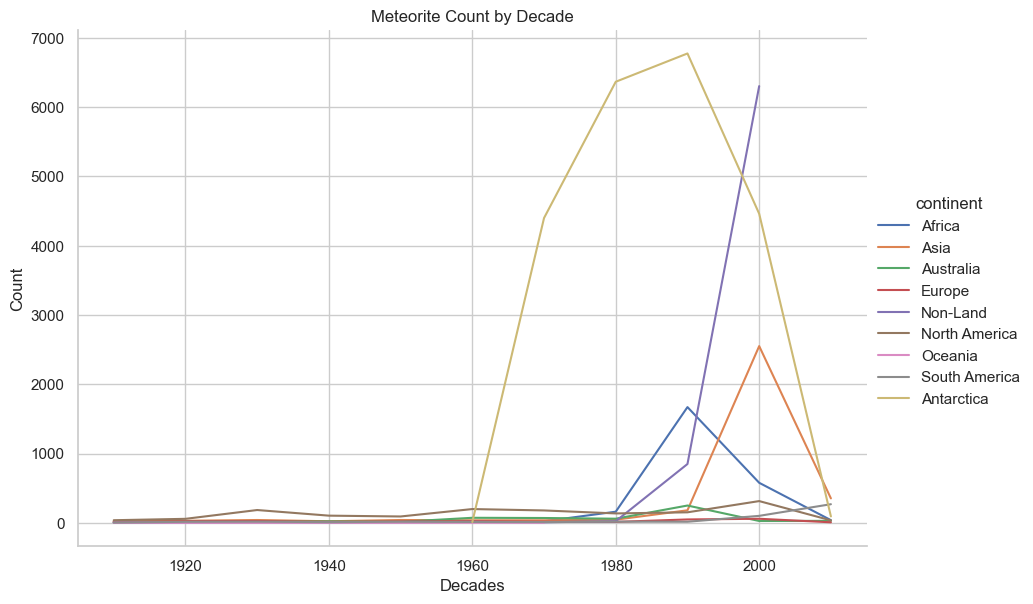

In [45]:
# creating a column by decade

filtered_rows['decade'] = (filtered_rows['year'] // 10) *10


grouped_data = filtered_rows.groupby(['decade', 'continent']).size().reset_index(name='count')


sns.set_theme(style="whitegrid")

e = sns.relplot(data=grouped_data, x='decade', y='count', hue = 'continent', kind = "line", height=6,aspect=1.5)
e.set(title='Meteorite Count by Decade', xlabel='Decades', ylabel='Count')
plt.show()


From this graph, we can determine:

Low consistency: South America, North America, Europe, Oceania, Australia

High Consistency: Antarctica, Africa, Asia

However when this distrubution is directly compared with its mass counter part we see this.

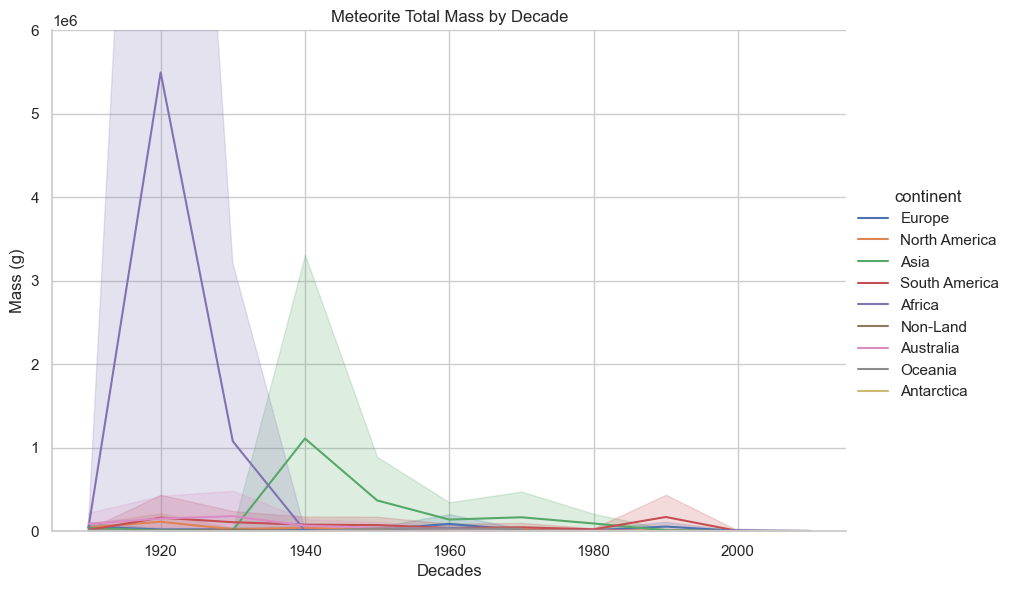

In [46]:

sns.set_theme(style="whitegrid")
r = sns.relplot(data=filtered_rows, x='decade', y='mass (g)', hue = 'continent', kind = "line", height=6,aspect=1.5)
r = r.set(title='Meteorite Total Mass by Decade', xlabel='Decades', ylabel='Mass (g)')
plt.ylim(0,6000000)

plt.show()

From the first graph, it shows that the majority of these impact events took place in Antartica between the 1960's and 2010's. However, our second graph doesn't reinforce this idea. It shows that through the early 1900's, Africa produced the largest meteorites compared to anywhere else.

## Discussion
In this project, we analyzed the relationships between the amount and total mass of impact events throughout recent history and their continental distribution. Through an analysis of the total mass and impact counts, we proved our hypothesis by discovering a normal distribution through measurements of both mass and total count. By looking at the mass of continents, it was revealed that in the early 1900s, Africa had the largest total mass by a large margin. Continents like Asia and South America also experienced some peaks from this graph showing that Africa's large result can't be an outlier. This relationship does seem reasonable especially since the largest meteorite on earth does reside in Africa. Next, looking at the total sum of mass by a half-century, this visualization provided a much more symmetrical shape. It revealed a linear increase in mass over 125 years, then a decrease by the same amount in the same amount of time. This pattern appears to continue but on a smaller scale during the centuries before the 1700s, although this could be attributed to the lack of records during those periods since over 75% of the recorded data came from the 1950s-2010s. Therefore, we can conclude there do exist "hot spots" for these events, but are derived by a cycle of approximately 250 years through their quantity, and size. We can also say that events most often happen in the more southern and larger continents of our world. These outcomes highlight the fascinating connections between geography, history, and the objects from space in shaping our understanding of meteorite impacts and our solar system.




## Refrences

1. Source of data https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/data

2. Seaborn data visualization https://seaborn.pydata.org/tutorial/introduction.html
4. Matplotlib for data viz 
5. World Continents shapefiles: https://hub.arcgis.com/datasets/esri::world-continents/about
6. from tqdm imported tqdm, Loading bar implementation for adding a continent column.
